<a href="https://colab.research.google.com/github/StrawhatRoy/StrawhatRoy/blob/main/polyregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/pressure.txt')
df

,S.no,Temp,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [5]:
x=df.iloc[:,1].values
x

array([  0,  20,  40,  60,  80, 100])

In [6]:
y=df.iloc[:,2]
y

0    0.0002
1    0.0012
2    0.0060
3    0.0300
4    0.0900
5    0.2700
Name: Pressure, dtype: float64

In [8]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x.reshape(-1,1),y)
y_pred=LR.predict(x.reshape(-1,1))
print(y_pred)

[-0.05086667 -0.00402667  0.04281333  0.08965333  0.13649333  0.18333333]


Text(0.5, 1.0, 'Temperature vs Pressure')

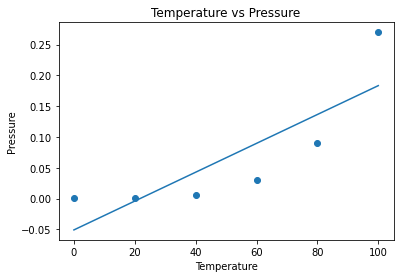

In [9]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(x,y_pred)
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.title("Temperature vs Pressure")

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x.reshape(-1,1))
x_poly

array([[1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 2.00e+01, 4.00e+02, 8.00e+03],
       [1.00e+00, 4.00e+01, 1.60e+03, 6.40e+04],
       [1.00e+00, 6.00e+01, 3.60e+03, 2.16e+05],
       [1.00e+00, 8.00e+01, 6.40e+03, 5.12e+05],
       [1.00e+00, 1.00e+02, 1.00e+04, 1.00e+06]])

In [15]:
lin2=LinearRegression()
lin2.fit(x_poly,y)
y_poly=lin2.predict(x_poly)
y_poly

array([-0.00198889,  0.00724444,  0.00371111,  0.02248889,  0.09865556,
        0.26728889])

Text(0.5, 1.0, 'Temperature vs Pressure')

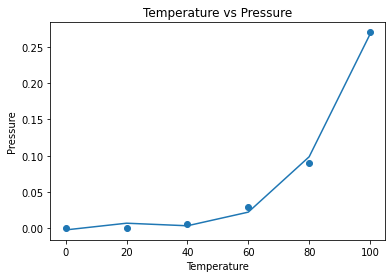

In [16]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(x,y_poly)
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.title("Temperature vs Pressure")

In [19]:
pred_df=pd.DataFrame({"Actual":y,"Predicted(Lin)":y_pred,"Predicted(Poly)":y_poly})
pred_df

,Actual,Predicted(Lin),Predicted(Poly)
0,0.0002,-0.050867,-0.001989
1,0.0012,-0.004027,0.007244
2,0.0060,0.042813,0.003711
3,0.0300,0.089653,0.022489
4,0.0900,0.136493,0.098656
5,0.2700,0.183333,0.267289


In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('SLR',mean_absolute_error(y,y_pred))
print('PR',mean_absolute_error(y,y_poly))

SLR 0.047653333333333346
PR 0.004899999999998261


In [21]:
print('SLR',mean_squared_error(y,y_pred))
print('PR',mean_squared_error(y,y_poly))

SLR 0.002870267555555557
PR 3.0875185185185124e-05


In [22]:
import numpy as np
print("LR",np.sqrt(mean_squared_error(y,y_pred)))
print("PR",np.sqrt(mean_squared_error(y,y_poly)))

LR 0.053574878026511244
PR 0.00555654435644899
